In [11]:
# Import the NumPy library for numerical operations
import numpy as np

# Q1:
# (a)Define the tridiagonal solver function with array conversion
def tridiagonal_solver_with_conversion(a, b, c, d):
    """
    Solves the tridiagonal system of equations Ax = d,
    where A is a tridiagonal matrix with diagonals a, b, and c.
    
    Parameters:
    a (list or numpy array): diagonal below the main diagonal
    b (list or numpy array): main diagonal
    c (list or numpy array): diagonal above the main diagonal
    d (list or numpy array): right-hand side of the equation
    
    Returns:
    x (numpy array): solution vector
    """
    
    # Convert all inputs to NumPy arrays for compatibility
    a, b, c, d = map(np.array, (a, b, c, d))
    
    # Initialize variables
    n = len(b)
    l = np.zeros(n - 1)
    m = np.zeros(n)
    y = np.zeros(n)
    x = np.zeros(n)
    
    # Step 1: Compute columns L and U
    m[0] = b[0]
    for j in range(n - 1):
        l[j] = c[j] / m[j]
        m[j + 1] = b[j + 1] - l[j] * a[j]
    
    # Step 2: Forward substitution to solve Ly = d
    y[0] = d[0]
    for j in range(1, n):
        y[j] = d[j] - l[j - 1] * y[j - 1]
    
    # Step 3: Backward substitution to solve Ux = y
    x[-1] = y[-1] / m[-1]
    for j in range(n - 2, -1, -1):
        x[j] = (y[j] - a[j] * x[j + 1]) / m[j]
    
    return x  # Return the solution vector x

In [13]:
# (b) Test the tridiagonal solver
a = np.array([2, 2, 2, 2])
b = np.array([1, 1, 1])
c = np.array([1, 1, 1])
d = np.array([5, 8, 8, 5])

# Solve the tridiagonal system to get x
x_solution = tridiagonal_solver(a, b, c, d)

# Verify the solution by multiplying A*x and checking if it equals d
A = np.zeros((len(a), len(a)))
np.fill_diagonal(A, a)
np.fill_diagonal(A[1:, :-1], c)
np.fill_diagonal(A[:-1, 1:], b)

d_computed = np.dot(A, x_solution)
is_solution_correct = np.allclose(d, d_computed)

x_solution, d_computed, is_solution_correct

(array([1.4, 2.2, 2.2, 1.4]), array([5., 8., 8., 5.]), True)

In [15]:
# Q2
# Importing matplotlib for plotting
import matplotlib.pyplot as plt

# Function to set up and solve the boundary value problem
def solve_boundary_value_problem(N):
    h = 1 / N
    x = np.linspace(0, 1, N + 1)
    pi2 = np.pi ** 2
    
    a = np.ones(N - 1) * (-1 / h ** 2)
    b = np.ones(N - 1) * (2 / h ** 2 + pi2)
    c = np.ones(N - 1) * (-1 / h ** 2)
    d = 2 * pi2 * np.sin(np.pi * x[1:-1])
    
    v = tridiagonal_solver_with_conversion(a, b, c, d)
    v = np.concatenate(([0], v, [0]))
    
    return x, v

# Function to compute the 2-norm of the error
def compute_error_2norm(v, exact_solution):
    error = v - exact_solution
    error_2norm = np.sqrt(np.sum(error ** 2))
    return error_2norm

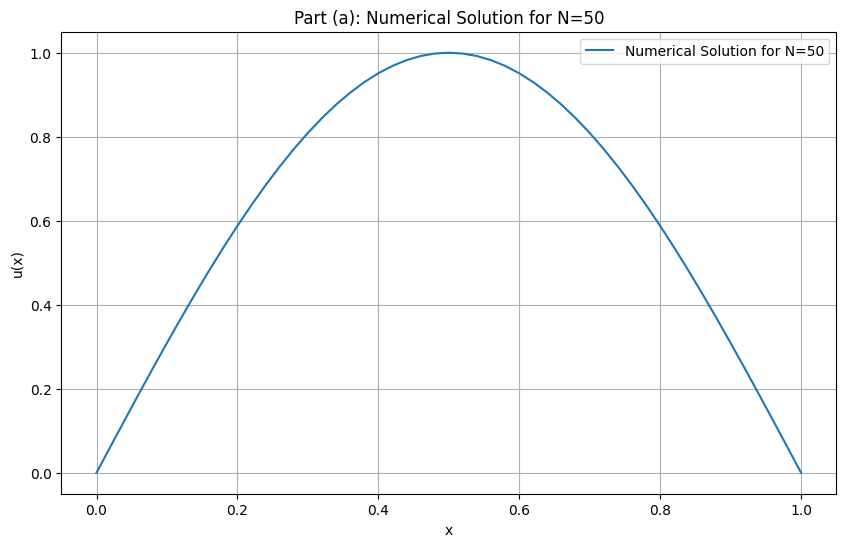

In [16]:
# Part (a): Solve for N = 50 and plot
N = 50
x, v = solve_boundary_value_problem(N)

plt.figure(figsize=(10, 6))
plt.plot(x, v, label="Numerical Solution for N=50")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.title("Part (a): Numerical Solution for N=50")
plt.legend()
plt.grid(True)
plt.show()

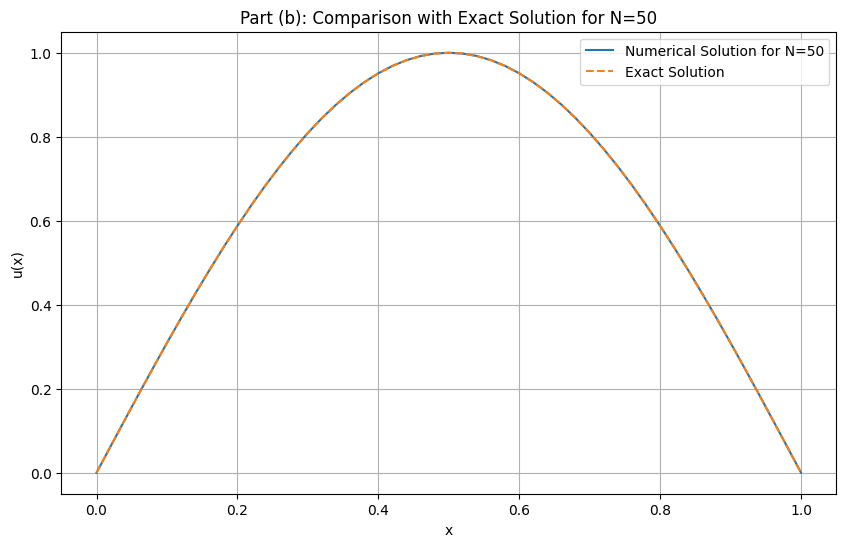

In [17]:
# Part (b): Compare with exact solution
exact_solution = np.sin(np.pi * x)
plt.figure(figsize=(10, 6))
plt.plot(x, v, label="Numerical Solution for N=50")
plt.plot(x, exact_solution, label="Exact Solution", linestyle='--')
plt.xlabel("x")
plt.ylabel("u(x)")
plt.title("Part (b): Comparison with Exact Solution for N=50")
plt.legend()
plt.grid(True)
plt.show()

In [21]:
# Part (c): Compute 2-norm error for N=50 and N=100
# I would assume the 2-norm error for N=100 can be decreasing exponentially
error_50 = compute_error_2norm(v, exact_solution)
N = 100
x_100, v_100 = solve_boundary_value_problem(N)
exact_solution_100 = np.sin(np.pi * x_100)
error_100 = compute_error_2norm(v_100, exact_solution_100)
print(f"Part (c): Error for N=50: {error_50}, Error for N=100: {error_100}")

Part (c): Error for N=50: 0.0008224940857685814, Error for N=100: 0.00029078839951569147


In [22]:
# Part (d):
# Self-Convergence: Compute the relative difference between solutions obtained with different grid resolutions. This difference should decrease as the grid is refined if the solution is converging.
# Rate of Convergence: The rate of convergence can be estimated by looking at how much the error (or the self-convergence measure) decreases when the grid is refined. For example, if the error is halved when the grid is doubled, then the rate of convergence is approximately first order.
# By employing a combination of these techniques, you can build confidence in the convergence and the accuracy of your numerical solution, even when an exact solution is not available for comparison.